# Exploration der Word2vec Embeddings 5

- Zeiträume: 50 Jahre
- ohne Bigramme
- vector_size: 300
- window: 20

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import statistics 

from collections import Counter
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from scipy import spatial
from sklearn.manifold import TSNE
from tabulate import tabulate

In [2]:
# trainierte Modelle laden

w2v1 = Word2Vec.load(os.path.join('trained_models/Word2Vec5', '5w2v1.model'))
w2v2 = Word2Vec.load(os.path.join('trained_models/Word2Vec5', '5w2v2.model'))
w2v3 = Word2Vec.load(os.path.join('trained_models/Word2Vec5', '5w2v3.model'))
w2v4 = Word2Vec.load(os.path.join('trained_models/Word2Vec5', '5w2v4.model'))
w2v5 = Word2Vec.load(os.path.join('trained_models/Word2Vec5', '5w2v5.model'))
w2v6 = Word2Vec.load(os.path.join('trained_models/Word2Vec5', '5w2v6.model'))
w2v7 = Word2Vec.load(os.path.join('trained_models/Word2Vec5', '5w2v7.model'))

In [3]:
periods = ['1700-1750', '1751-1800', '1801-1850', '1851-1900', '1901-1950', '1951-2000', '2001-2021']

In [4]:
models = [w2v1, w2v2, w2v3, w2v4, w2v5, w2v6, w2v7] 

In [5]:
# Hilfsfunktion zum Vergleich der most similar words eines Lemmas in den Zeitabschnitten

def compare_words(periods, models, word):
    msw = {}
    for p, m in zip(periods, models):
        if word in m.wv:
            msw.update({p : m.wv.most_similar(positive=[word], topn=10)})
        elif word not in m.wv:
            msw.update({p : 'not in vocab'})
    table = pd.DataFrame.from_dict(msw)
    return table

In [6]:
# Hilfsfunktion zum Vergleich der Cosinus-Ähnlichkeit in den Zeitabschnitten

def compare_cos(periods, models, word1, word2):
    cosines = {}
    for p, m in zip(periods, models):
        if word1 in m.wv:
            vector1 = m.wv[word1]  
            vector2 = m.wv[word2]  
            cos = 1 - spatial.distance.cosine(vector1, vector2) 
            cosines.update({p : cos})
    return cosines

## Kontrollgruppe

### Kontrollgruppe - molto

In [7]:
domani0 = compare_cos(periods, models, 'domani', 'molto')
finora0 = compare_cos(periods, models, 'finora', 'molto')
ieri0 = compare_cos(periods, models, 'ieri', 'molto')
oggi0 = compare_cos(periods, models, 'oggi', 'molto')
presto0 = compare_cos(periods, models, 'presto', 'molto')
sempre0 = compare_cos(periods, models, 'sempre', 'molto')
spesso0 = compare_cos(periods, models, 'spesso', 'molto')
essere0 = compare_cos(periods, models, 'essere', 'molto')
avere0 = compare_cos(periods, models, 'avere', 'molto')

In [8]:
spesso0

{'1700-1750': 0.3365863263607025,
 '1751-1800': 0.4750043451786041,
 '1801-1850': 0.514270544052124,
 '1851-1900': 0.4068884253501892,
 '1901-1950': 0.505332350730896,
 '1951-2000': 0.46571189165115356,
 '2001-2021': 0.5341779589653015}

In [9]:
molto_df = pd.DataFrame([domani0, finora0, ieri0, oggi0, presto0, sempre0, spesso0, essere0, avere0])

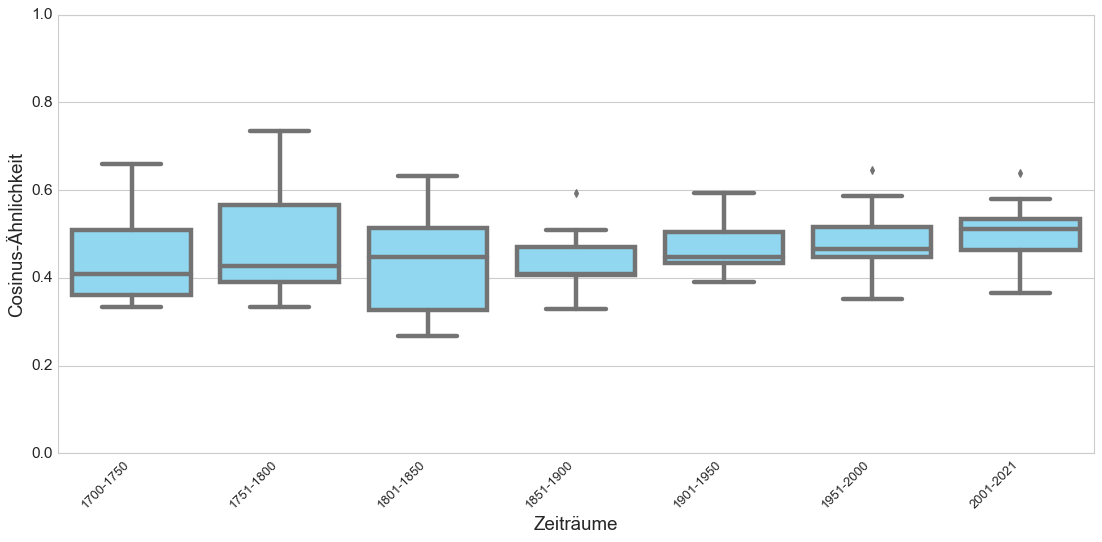

In [14]:
# box plot

plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(periods)))
plt.xticks(ticks=x_indexes, labels=periods, rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

sns.boxplot(data=molto_df, color='#80dfff');

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right', fontsize='small')

plt.show()

In [15]:
# Median pro Zeitraum
molto_median = dict(molto_df.median())

# 25%-Quantil
molto_25 = dict(molto_df.quantile(0.25))
molto_25_list = [float(x) for x in list(molto_25.values())]

# 75%-Quantil
molto_75 = dict(molto_df.quantile(0.75))
molto_75_list = [float(x) for x in list(molto_75.values())]

# min
molto_min = dict(molto_df.min())
molto_min_list = [float(x) for x in list(molto_min.values())]

# max
molto_max = dict(molto_df.max())
molto_max_list = [float(x) for x in list(molto_max.values())]

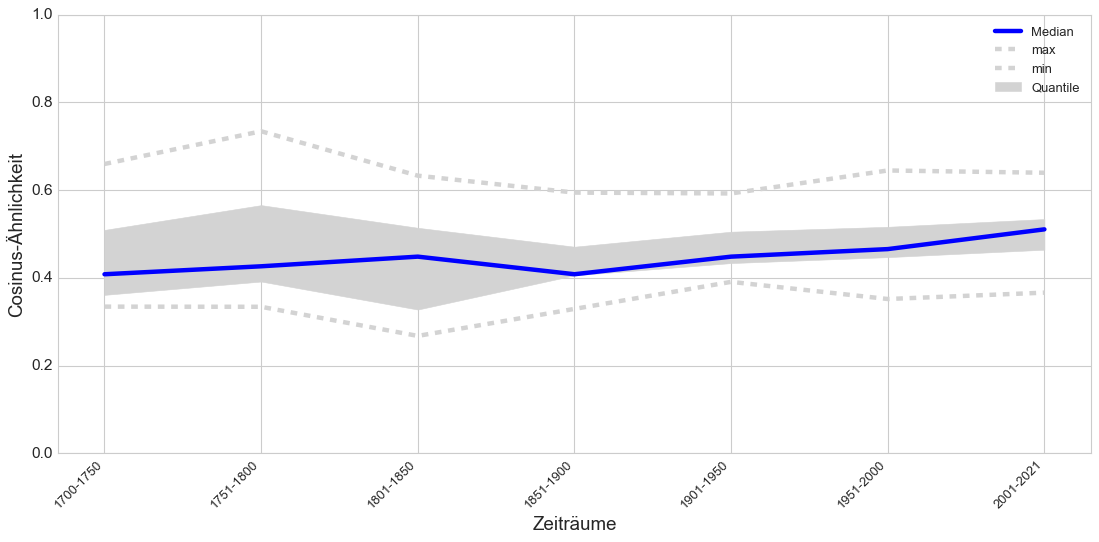

In [16]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(molto_median)))
plt.xticks(ticks=x_indexes, labels=molto_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, molto_median.values(), label='Median', color='b')
plt.fill_between(x_indexes, molto_75_list, molto_25_list, label='Quantile', color='#D3D3D3')
plt.plot(x_indexes, molto_max_list, label='max', linestyle='--', color='#D3D3D3')
plt.plot(x_indexes, molto_min_list, label='min', linestyle='--', color='#D3D3D3')


# Regressionslinie
#coef = np.polyfit(x_indexes, list(molto_median.values()), 1)
#poly1d_fn = np.poly1d(coef) 
#plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### Kontrollgruppe - Quelldomäne

In [17]:
# domani 

domani1 = compare_cos(periods, models, 'domani', 'angoscia')
domani2 = compare_cos(periods, models, 'domani', 'atterrire')
domani3 = compare_cos(periods, models, 'domani', 'panico')
domani4 = compare_cos(periods, models, 'domani', 'paura')
domani6 = compare_cos(periods, models, 'domani', 'schifo')
domani7 = compare_cos(periods, models, 'domani', 'sgomentare')
domani8 = compare_cos(periods, models, 'domani', 'sgomento')
domani9 = compare_cos(periods, models, 'domani', 'spaventare')
domani10 = compare_cos(periods, models, 'domani', 'spavento')
domani11 = compare_cos(periods, models, 'domani', 'terrore')

domani_df = pd.DataFrame([domani1, domani2, domani3, domani4, domani6, domani7, domani8, domani9, domani10, domani11])

# Median pro Zeitraum
domani_median = dict(domani_df.median())

# 25%-Quantil
domani_25 = dict(domani_df.quantile(0.25))
domani25_list = [float(x) for x in list(domani_25.values())]

# 75%-Quantil
domani_75 = dict(domani_df.quantile(0.75))
domani_75_list = [float(x) for x in list(domani_75.values())]

# min pro Zeitraum
domani_min = dict(domani_df.min())
domani_min_list = [float(x) for x in list(domani_min.values())]

#max pro Zeitraum 
domani_max = dict(domani_df.max())
domani_max_list = [float(x) for x in list(domani_max.values())]

In [18]:
# finora 

finora1 = compare_cos(periods, models, 'finora', 'angoscia')
finora2 = compare_cos(periods, models, 'finora', 'atterrire')
finora3 = compare_cos(periods, models, 'finora', 'panico')
finora4 = compare_cos(periods, models, 'finora', 'paura')
finora6 = compare_cos(periods, models, 'finora', 'schifo')
finora7 = compare_cos(periods, models, 'finora', 'sgomentare')
finora8 = compare_cos(periods, models, 'finora', 'sgomento')
finora9 = compare_cos(periods, models, 'finora', 'spaventare')
finora10 = compare_cos(periods, models, 'finora', 'spavento')
finora11 = compare_cos(periods, models, 'finora', 'terrore')

finora_df = pd.DataFrame([finora1, finora2, finora3, finora4, finora6, finora7, finora8, finora9, finora10, finora11])

# Median pro Zeitraum
finora_median = dict(finora_df.median())

# 25%-Quantil
finora_25 = dict(finora_df.quantile(0.25))
finora25_list = [float(x) for x in list(finora_25.values())]

# 75%-Quantil
finora_75 = dict(finora_df.quantile(0.75))
finora_75_list = [float(x) for x in list(finora_75.values())]

# min pro Zeitraum
finora_min = dict(finora_df.min())
finora_min_list = [float(x) for x in list(finora_min.values())]

#max pro Zeitraum 
finora_max = dict(finora_df.max())
finora_max_list = [float(x) for x in list(finora_max.values())]

In [19]:
# ieri 

ieri1 = compare_cos(periods, models, 'ieri', 'angoscia')
ieri2 = compare_cos(periods, models, 'ieri', 'atterrire')
ieri3 = compare_cos(periods, models, 'ieri', 'panico')
ieri4 = compare_cos(periods, models, 'ieri', 'paura')
ieri6 = compare_cos(periods, models, 'ieri', 'schifo')
ieri7 = compare_cos(periods, models, 'ieri', 'sgomentare')
ieri8 = compare_cos(periods, models, 'ieri', 'sgomento')
ieri9 = compare_cos(periods, models, 'ieri', 'spaventare')
ieri10 = compare_cos(periods, models, 'ieri', 'spavento')
ieri11 = compare_cos(periods, models, 'ieri', 'terrore')

ieri_df = pd.DataFrame([ieri1, ieri2, ieri3, ieri4, ieri6, ieri7, ieri8, ieri9, ieri10, ieri11])

# Median pro Zeitraum
ieri_median = dict(ieri_df.median())

# 25%-Quantil
ieri_25 = dict(ieri_df.quantile(0.25))
ieri25_list = [float(x) for x in list(ieri_25.values())]

# 75%-Quantil
ieri_75 = dict(ieri_df.quantile(0.75))
ieri_75_list = [float(x) for x in list(ieri_75.values())]

# min pro Zeitraum
ieri_min = dict(ieri_df.min())
ieri_min_list = [float(x) for x in list(ieri_min.values())]

#max pro Zeitraum 
ieri_max = dict(ieri_df.max())
ieri_max_list = [float(x) for x in list(ieri_max.values())]

In [20]:
# oggi 

oggi1 = compare_cos(periods, models, 'oggi', 'angoscia')
oggi2 = compare_cos(periods, models, 'oggi', 'atterrire')
oggi3 = compare_cos(periods, models, 'oggi', 'panico')
oggi4 = compare_cos(periods, models, 'oggi', 'paura')
oggi6 = compare_cos(periods, models, 'oggi', 'schifo')
oggi7 = compare_cos(periods, models, 'oggi', 'sgomentare')
oggi8 = compare_cos(periods, models, 'oggi', 'sgomento')
oggi9 = compare_cos(periods, models, 'oggi', 'spaventare')
oggi10 = compare_cos(periods, models, 'oggi', 'spavento')
oggi11 = compare_cos(periods, models, 'oggi', 'terrore')

oggi_df = pd.DataFrame([oggi1, oggi2, oggi3, oggi4, oggi6, oggi7, oggi8, oggi9, oggi10, oggi11])

# Median pro Zeitraum
oggi_median = dict(oggi_df.median())

# 25%-Quantil
oggi_25 = dict(oggi_df.quantile(0.25))
oggi25_list = [float(x) for x in list(oggi_25.values())]

# 75%-Quantil
oggi_75 = dict(oggi_df.quantile(0.75))
oggi_75_list = [float(x) for x in list(oggi_75.values())]

# min pro Zeitraum
oggi_min = dict(oggi_df.min())
oggi_min_list = [float(x) for x in list(oggi_min.values())]

#max pro Zeitraum 
oggi_max = dict(oggi_df.max())
oggi_max_list = [float(x) for x in list(oggi_max.values())]

In [21]:
# presto 

presto1 = compare_cos(periods, models, 'presto', 'angoscia')
presto2 = compare_cos(periods, models, 'presto', 'atterrire')
presto3 = compare_cos(periods, models, 'presto', 'panico')
presto4 = compare_cos(periods, models, 'presto', 'paura')
presto6 = compare_cos(periods, models, 'presto', 'schifo')
presto7 = compare_cos(periods, models, 'presto', 'sgomentare')
presto8 = compare_cos(periods, models, 'presto', 'sgomento')
presto9 = compare_cos(periods, models, 'presto', 'spaventare')
presto10 = compare_cos(periods, models, 'presto', 'spavento')
presto11 = compare_cos(periods, models, 'presto', 'terrore')

presto_df = pd.DataFrame([presto1, presto2, presto3, presto4, presto6, presto7, presto8, presto9, presto10, presto11])

# Median pro Zeitraum
presto_median = dict(presto_df.median())

# 25%-Quantil
presto_25 = dict(presto_df.quantile(0.25))
presto25_list = [float(x) for x in list(presto_25.values())]

# 75%-Quantil
presto_75 = dict(presto_df.quantile(0.75))
presto_75_list = [float(x) for x in list(presto_75.values())]

# min pro Zeitraum
presto_min = dict(presto_df.min())
presto_min_list = [float(x) for x in list(presto_min.values())]

#max pro Zeitraum 
presto_max = dict(presto_df.max())
presto_max_list = [float(x) for x in list(presto_max.values())]

In [22]:
# sempre 

sempre1 = compare_cos(periods, models, 'sempre', 'angoscia')
sempre2 = compare_cos(periods, models, 'sempre', 'atterrire')
sempre3 = compare_cos(periods, models, 'sempre', 'panico')
sempre4 = compare_cos(periods, models, 'sempre', 'paura')
sempre6 = compare_cos(periods, models, 'sempre', 'schifo')
sempre7 = compare_cos(periods, models, 'sempre', 'sgomentare')
sempre8 = compare_cos(periods, models, 'sempre', 'sgomento')
sempre9 = compare_cos(periods, models, 'sempre', 'spaventare')
sempre10 = compare_cos(periods, models, 'sempre', 'spavento')
sempre11 = compare_cos(periods, models, 'sempre', 'terrore')

sempre_df = pd.DataFrame([sempre1, sempre2, sempre3, sempre4, sempre6, sempre7, sempre8, sempre9, sempre10, sempre11])

# Median pro Zeitraum
sempre_median = dict(sempre_df.median())

# 25%-Quantil
sempre_25 = dict(sempre_df.quantile(0.25))
sempre25_list = [float(x) for x in list(sempre_25.values())]

# 75%-Quantil
sempre_75 = dict(sempre_df.quantile(0.75))
sempre_75_list = [float(x) for x in list(sempre_75.values())]

# min pro Zeitraum
sempre_min = dict(sempre_df.min())
sempre_min_list = [float(x) for x in list(sempre_min.values())]

#max pro Zeitraum 
sempre_max = dict(sempre_df.max())
sempre_max_list = [float(x) for x in list(sempre_max.values())]

In [23]:
# spesso 

spesso1 = compare_cos(periods, models, 'spesso', 'angoscia')
spesso2 = compare_cos(periods, models, 'spesso', 'atterrire')
spesso3 = compare_cos(periods, models, 'spesso', 'panico')
spesso4 = compare_cos(periods, models, 'spesso', 'paura')
spesso6 = compare_cos(periods, models, 'spesso', 'schifo')
spesso7 = compare_cos(periods, models, 'spesso', 'sgomentare')
spesso8 = compare_cos(periods, models, 'spesso', 'sgomento')
spesso9 = compare_cos(periods, models, 'spesso', 'spaventare')
spesso10 = compare_cos(periods, models, 'spesso', 'spavento')
spesso11 = compare_cos(periods, models, 'spesso', 'terrore')

spesso_df = pd.DataFrame([spesso1, spesso2, spesso3, spesso4, spesso6, spesso7, spesso8, spesso9, spesso10, spesso11])

# Median pro Zeitraum
spesso_median = dict(spesso_df.median())

# 25%-Quantil
spesso_25 = dict(spesso_df.quantile(0.25))
spesso25_list = [float(x) for x in list(spesso_25.values())]

# 75%-Quantil
spesso_75 = dict(spesso_df.quantile(0.75))
spesso_75_list = [float(x) for x in list(spesso_75.values())]

# min pro Zeitraum
spesso_min = dict(spesso_df.min())
spesso_min_list = [float(x) for x in list(spesso_min.values())]

#max pro Zeitraum 
spesso_max = dict(spesso_df.max())
spesso_max_list = [float(x) for x in list(spesso_max.values())]

In [24]:
# essere 

essere1 = compare_cos(periods, models, 'essere', 'angoscia')
essere2 = compare_cos(periods, models, 'essere', 'atterrire')
essere3 = compare_cos(periods, models, 'essere', 'panico')
essere4 = compare_cos(periods, models, 'essere', 'paura')
essere6 = compare_cos(periods, models, 'essere', 'schifo')
essere7 = compare_cos(periods, models, 'essere', 'sgomentare')
essere8 = compare_cos(periods, models, 'essere', 'sgomento')
essere9 = compare_cos(periods, models, 'essere', 'spaventare')
essere10 = compare_cos(periods, models, 'essere', 'spavento')
essere11 = compare_cos(periods, models, 'essere', 'terrore')

essere_df = pd.DataFrame([essere1, essere2, essere3, essere4, essere6, essere7, essere8, essere9, essere10, essere11])

# Median pro Zeitraum
essere_median = dict(essere_df.median())

# 25%-Quantil
essere_25 = dict(essere_df.quantile(0.25))
essere25_list = [float(x) for x in list(essere_25.values())]

# 75%-Quantil
essere_75 = dict(essere_df.quantile(0.75))
essere_75_list = [float(x) for x in list(essere_75.values())]

# min pro Zeitraum
essere_min = dict(essere_df.min())
essere_min_list = [float(x) for x in list(essere_min.values())]

#max pro Zeitraum 
essere_max = dict(essere_df.max())
essere_max_list = [float(x) for x in list(essere_max.values())]

In [25]:
# avere 

avere1 = compare_cos(periods, models, 'avere', 'angoscia')
avere2 = compare_cos(periods, models, 'avere', 'atterrire')
avere3 = compare_cos(periods, models, 'avere', 'panico')
avere4 = compare_cos(periods, models, 'avere', 'paura')
avere6 = compare_cos(periods, models, 'avere', 'schifo')
avere7 = compare_cos(periods, models, 'avere', 'sgomentare')
avere8 = compare_cos(periods, models, 'avere', 'sgomento')
avere9 = compare_cos(periods, models, 'avere', 'spaventare')
avere10 = compare_cos(periods, models, 'avere', 'spavento')
avere11 = compare_cos(periods, models, 'avere', 'terrore')

avere_df = pd.DataFrame([avere1, avere2, avere3, avere4, avere6, avere7, avere8, avere9, avere10, avere11])

# Median pro Zeitraum
avere_median = dict(avere_df.median())

# 25%-Quantil
avere_25 = dict(avere_df.quantile(0.25))
avere25_list = [float(x) for x in list(avere_25.values())]

# 75%-Quantil
avere_75 = dict(avere_df.quantile(0.75))
avere_75_list = [float(x) for x in list(avere_75.values())]

# min pro Zeitraum
avere_min = dict(avere_df.min())
avere_min_list = [float(x) for x in list(avere_min.values())]

#max pro Zeitraum 
avere_max = dict(avere_df.max())
avere_max_list = [float(x) for x in list(avere_max.values())]

#### Kontrollgruppe - Quelldomäne gesamt

In [26]:
# Median gesamt

control_median_df = pd.DataFrame([domani_median, finora_median, ieri_median, oggi_median, presto_median, sempre_median, 
                                  spesso_median, essere_median, avere_median])
control_median = dict(control_median_df.median())

In [27]:
# min gesamt

control_min_df = pd.DataFrame([domani_min, finora_min, ieri_min, oggi_min, presto_min, sempre_min, spesso_min, 
                              essere_min, avere_min])
control_min = dict(control_min_df.min())
control_min_list = [float(x) for x in list(control_min.values())]

In [28]:
# 75 gesamt

control_75_df = pd.DataFrame([domani_75, finora_75, ieri_75, oggi_75, presto_75, sempre_75, spesso_75,
                             essere_75, avere_75])
control_75 = dict(control_75_df.quantile(0.75))
control_75_list = [float(x) for x in list(control_75.values())]

In [29]:
# 25%-Quantil gesamt

control_25_df = pd.DataFrame([domani_25, finora_25, ieri_25, oggi_25, presto_25, sempre_25, spesso_25,
                             essere_25, avere_25])
control_25 = dict(control_25_df.quantile(0.25))
control_25_list = [float(x) for x in list(control_25.values())]

In [30]:
# max gesamt

control_max_df = pd.DataFrame([domani_max, finora_max, ieri_max, oggi_max, presto_max, sempre_max, spesso_max,
                              essere_max, avere_max])
control_max = dict(control_max_df.max())
control_max_list = [float(x) for x in list(control_max.values())]

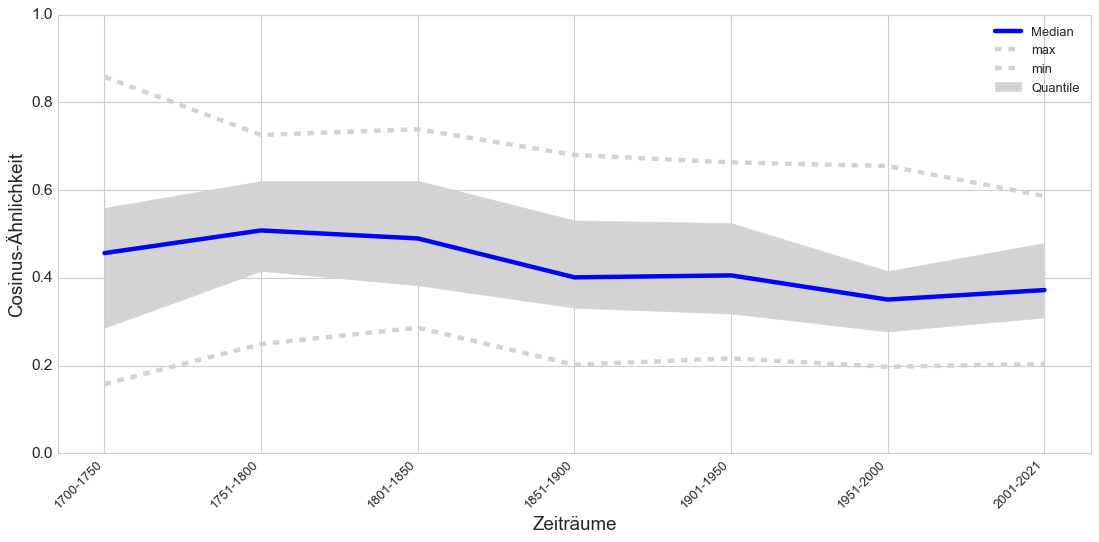

In [31]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(control_median)))
plt.xticks(ticks=x_indexes, labels=control_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, control_median.values(), label='Median', color='b')
plt.fill_between(x_indexes, control_75_list, control_25_list, label='Quantile', color='#D3D3D3')
plt.plot(x_indexes, control_max_list, label='max', linestyle='--', color='#D3D3D3')
plt.plot(x_indexes, control_min_list, label='min', linestyle='--', color='#D3D3D3')

# Regressionslinie
#coef = np.polyfit(x_indexes, list(control_median.values()), 1)
#poly1d_fn = np.poly1d(coef) 
#plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

In [32]:
control_df = pd.concat([domani_df, finora_df, ieri_df, oggi_df, presto_df, sempre_df, spesso_df])

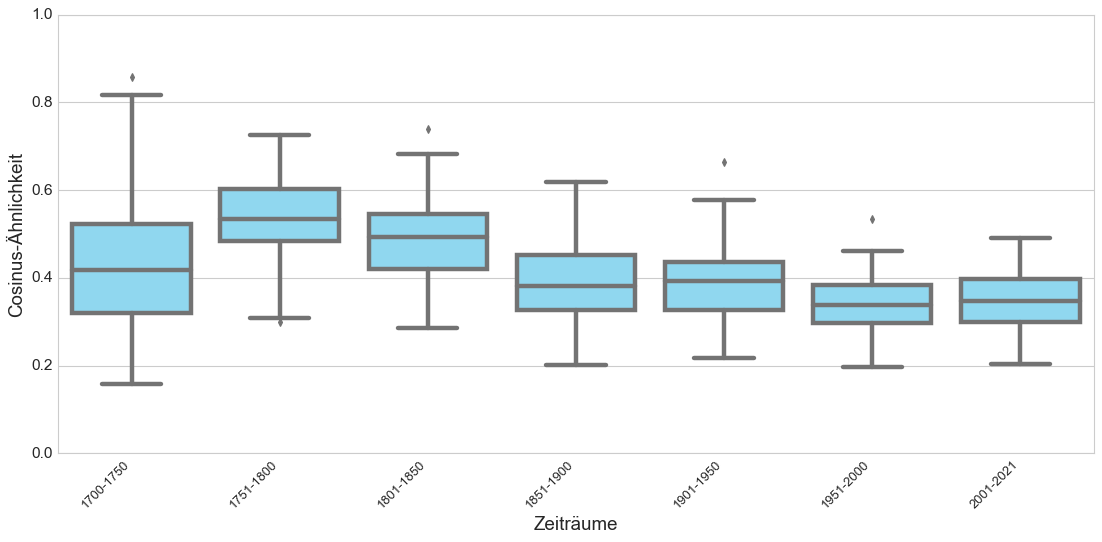

In [33]:
# box plot

plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(periods)))
plt.xticks(ticks=x_indexes, labels=periods, rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

sns.boxplot(data=control_df, color='#80dfff');

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right', fontsize='small')

plt.show()

## Adverbien

### mostruosamente

In [34]:
compare_words(periods, models, 'mostruosamente')

,1700-1750,1751-1800,1801-1850,1851-1900,1901-1950,1951-2000,2001-2021
0,not in vocab,not in vocab,"(salutari, 0.9814549088478088)","(sovrabbondanza, 0.8997406959533691)","(incomposto, 0.8598261475563049)","(risucchiare, 0.8513707518577576)","(cromatico, 0.8084151148796082)"
1,not in vocab,not in vocab,"(contenenza, 0.9808891415596008)","(ebrezza, 0.8947344422340393)","(prodigiosamente, 0.8478313088417053)","(babele, 0.8492598533630371)","(nn, 0.8046861886978149)"
2,not in vocab,not in vocab,"(forense, 0.9804397225379944)","(trepidanza, 0.8919047117233276)","(intensit, 0.8474702835083008)","(instabile, 0.8295770883560181)","(declinazione, 0.8040781021118164)"
3,not in vocab,not in vocab,"(reciprochi, 0.9793530106544495)","(irato, 0.8917113542556763)","(occhiaia, 0.8446317315101624)","(roseo, 0.8293580412864685)","(endocrino, 0.8014696836471558)"
4,not in vocab,not in vocab,"(giocolari, 0.9792954921722412)","(riserbatezza, 0.8891266584396362)","(piovra, 0.8431593179702759)","(opulento, 0.8271463513374329)","(piccante, 0.7880800366401672)"
5,not in vocab,not in vocab,"(ciurmadori, 0.9791654944419861)","(abbandonandomi, 0.8889898657798767)","(colorire, 0.8360214233398438)","(avventurare, 0.8232324719429016)","(sfuggente, 0.7874167561531067)"
6,not in vocab,not in vocab,"(ordinarissimamente, 0.9791582822799683)","(disdegno, 0.8889635801315308)","(incisivo, 0.8353189826011658)","(inesorabilmente, 0.8229943513870239)","(seduzione, 0.7870779633522034)"
7,not in vocab,not in vocab,"(anatomico, 0.9789687991142273)","(invocarne, 0.8881329894065857)","(mutevole, 0.8347859382629395)","(debolmente, 0.8220744132995605)","(track, 0.7862990498542786)"
8,not in vocab,not in vocab,"(recessi, 0.9789345860481262)","(simulare, 0.887435257434845)","(emanazione, 0.830539345741272)","(pigro, 0.8210430145263672)","(giochino, 0.7862670421600342)"
9,not in vocab,not in vocab,"(lasciami, 0.9788339734077454)","(conjugale, 0.8873671293258667)","(pallidissimo, 0.8304072618484497)","(scardinare, 0.8129667639732361)","(padronanza, 0.7849853038787842)"


#### molto

In [35]:
compare_cos(periods, models, 'mostruosamente', 'molto')

{'1801-1850': 0.6478807926177979,
 '1851-1900': 0.5162745714187622,
 '1901-1950': 0.5125641226768494,
 '1951-2000': 0.595005452632904,
 '2001-2021': 0.5799980163574219}

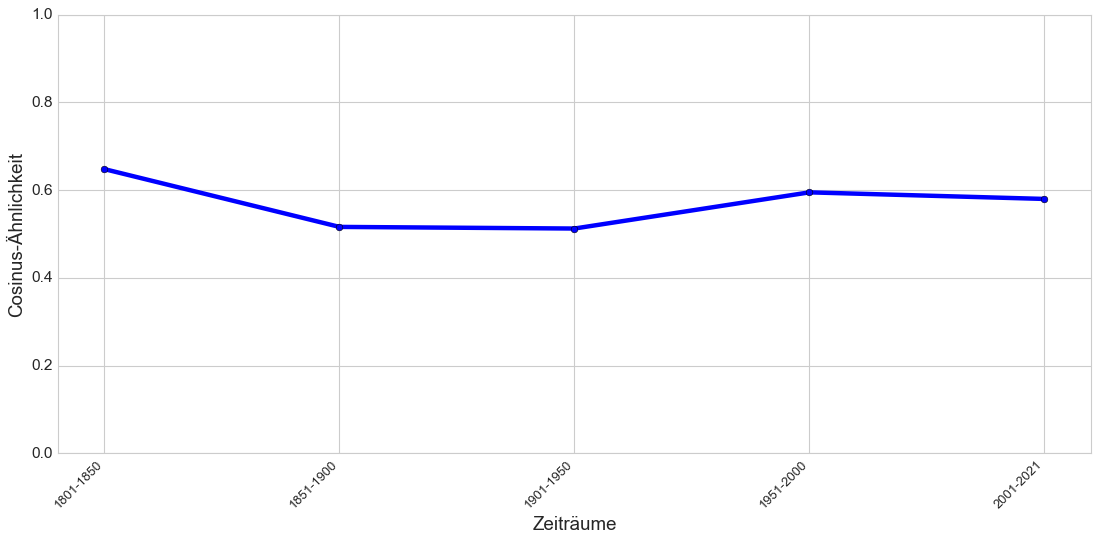

In [36]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'mostruosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='mostruosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(data.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

#### Quelldomäne

In [37]:
mostruosamente1 = compare_cos(periods, models, 'mostruosamente', 'angoscia')
mostruosamente2 = compare_cos(periods, models, 'mostruosamente', 'atterrire')
mostruosamente3 = compare_cos(periods, models, 'mostruosamente', 'panico')
mostruosamente4 = compare_cos(periods, models, 'mostruosamente', 'paura')
#mostruosamente5 = compare_cos(periods, models, 'mostruosamente', 'raccapricciare')
mostruosamente6 = compare_cos(periods, models, 'mostruosamente', 'schifo')
mostruosamente7 = compare_cos(periods, models, 'mostruosamente', 'sgomentare')
mostruosamente8 = compare_cos(periods, models, 'mostruosamente', 'sgomento')
mostruosamente9 = compare_cos(periods, models, 'mostruosamente', 'spaventare')
mostruosamente10 = compare_cos(periods, models, 'mostruosamente', 'spavento')
mostruosamente11 = compare_cos(periods, models, 'mostruosamente', 'terrore')

In [38]:
mostruosamente_df = pd.DataFrame([mostruosamente1, mostruosamente2, mostruosamente3, mostruosamente4, mostruosamente6, mostruosamente7, mostruosamente8, mostruosamente9, mostruosamente10, mostruosamente11])

# Median pro Zeitraum
mostruosamente_median = dict(mostruosamente_df.median())

# min pro Zeitraum
mostruosamente_min = dict(mostruosamente_df.min())
mostruosamente_min_list = [float(x) for x in list(mostruosamente_min.values())]

#max pro Zeitraum 
mostruosamente_max = dict(mostruosamente_df.max())
mostruosamente_max_list = [float(x) for x in list(mostruosamente_max.values())]

# 25%-Quantil
mostruosamente_25 = dict(mostruosamente_df.quantile(0.25))
mostruosamente_25_list = [float(x) for x in list(mostruosamente_25.values())]

# 75%-Quantil
mostruosamente_75 = dict(mostruosamente_df.quantile(0.75))
mostruosamente_75_list = [float(x) for x in list(mostruosamente_75.values())]

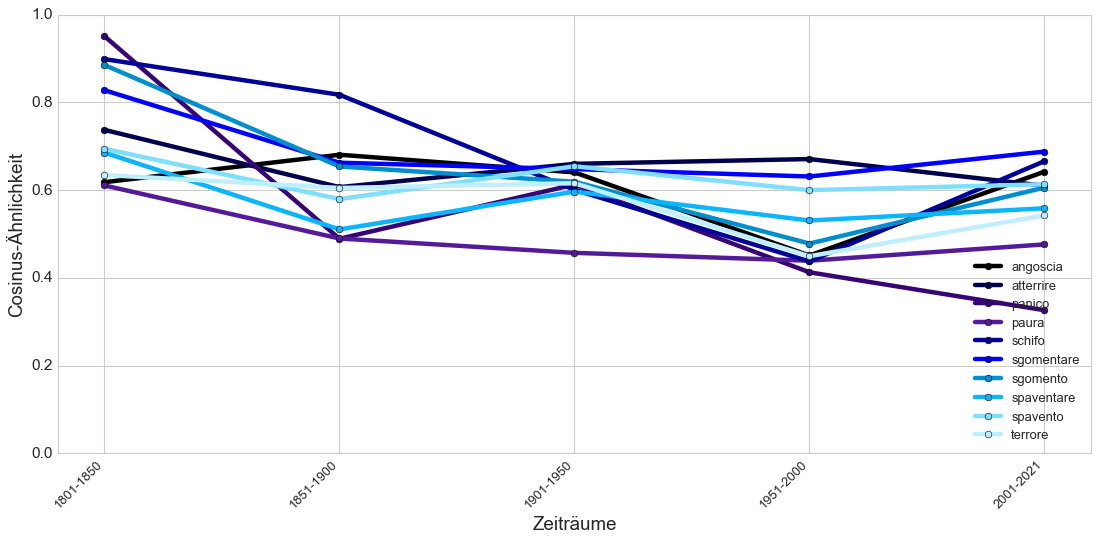

In [39]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

# Nur Median

x_indexes = list(np.arange(len(mostruosamente_median)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, mostruosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, mostruosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, mostruosamente4.values(), label='paura', marker='o', color='#551a99')
#plt.plot(x_indexes, mostruosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, mostruosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, mostruosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, mostruosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, mostruosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, mostruosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, mostruosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, mostruosamente_median.values(), label='Median', marker='o', color='r')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(mostruosamente_median.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='lower right', fontsize='small')

plt.show()

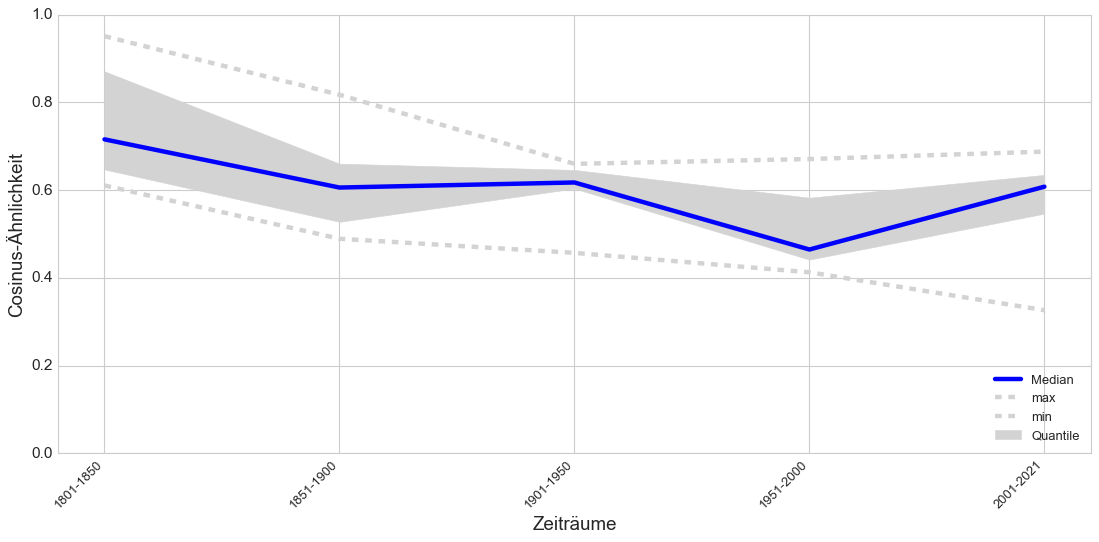

In [40]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_median)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente_median.values(), label='Median', color='b')
plt.fill_between(x_indexes, mostruosamente_75_list, mostruosamente_25_list, label='Quantile', color='#D3D3D3')
plt.plot(x_indexes, mostruosamente_max_list, label='max', linestyle='--', color='#D3D3D3')
plt.plot(x_indexes, mostruosamente_min_list, label='min', linestyle='--', color='#D3D3D3')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(mostruosamente_median.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='lower right', fontsize='small')

plt.show()

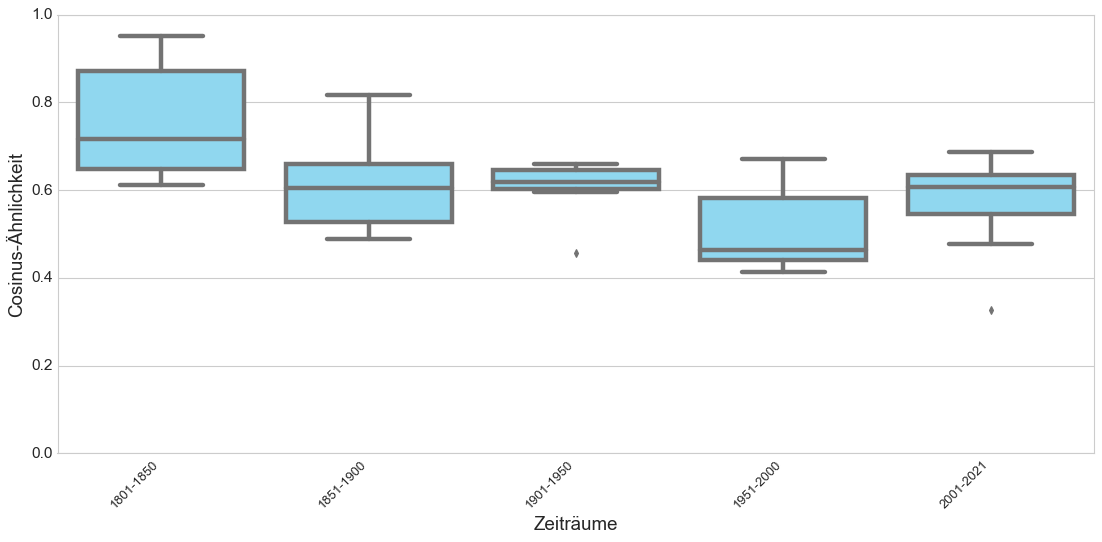

In [41]:
# box plot

plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(periods)))
plt.xticks(ticks=x_indexes, labels=periods, rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

sns.boxplot(data=mostruosamente_df, color='#80dfff');

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right', fontsize='small')

plt.show()

### orribilmente

In [42]:
compare_words(periods, models, 'orribilmente')

,1700-1750,1751-1800,1801-1850,1851-1900,1901-1950,1951-2000,2001-2021
0,"(rugge, 0.9287539720535278)","(nari, 0.9277799129486084)","(sotterra, 0.9342636466026306)","(bava, 0.7687178254127502)","(terribilmente, 0.7430328130722046)","(sfigurato, 0.8106796741485596)","(mutilare, 0.8563787341117859)"
1,"(frangia, 0.9262122511863708)","(teschio, 0.9169887900352478)","(rovente, 0.9308527112007141)","(brancicare, 0.7587449550628662)","(artiglio, 0.7391485571861267)","(orrendamente, 0.8078586459159851)","(eternità, 0.8401384353637695)"
2,"(stridere, 0.925575315952301)","(ultrice, 0.912568211555481)","(flagellare, 0.9261155128479004)","(rantolo, 0.7327290773391724)","(epilettico, 0.737565279006958)","(carabina, 0.7830695509910583)","(sahr, 0.8258711099624634)"
3,"(atri, 0.9242548942565918)","(minacciar, 0.9103623032569885)","(orrendamente, 0.9243972897529602)","(insoffribile, 0.732024073600769)","(spaventosamente, 0.7281811833381653)","(cadavere, 0.7827780246734619)","(zee, 0.8240856528282166)"
4,"(vada, 0.913638174533844)","(sanguigno, 0.9102848768234253)","(infuriare, 0.9238755702972412)","(percuotere, 0.7291631102561951)","(attanagliare, 0.7265528440475464)","(torturato, 0.7766465544700623)","(preda, 0.8206081986427307)"
5,"(fulmin, 0.9133386015892029)","(asperso, 0.9101730585098267)","(percosso, 0.9190486669540405)","(afferrarmi, 0.7285772562026978)","(scemo, 0.7248852849006653)","(mutilato, 0.7753938436508179)","(carceriere, 0.8202394843101501)"
6,"(feral, 0.9121317267417908)","(folgore, 0.9099276065826416)","(scrollare, 0.9186663031578064)","(scoverto, 0.7269498705863953)","(dolorosamente, 0.7243903279304504)","(martoriare, 0.773918628692627)","(trii, 0.8122876286506653)"
7,"(gerusalem, 0.9111901521682739)","(empiere, 0.9096114039421082)","(mormorio, 0.9147273898124695)","(scorrersi, 0.7263534069061279)","(schiaffeggiare, 0.7243154644966125)","(sfigurati, 0.7727276682853699)","(gemito, 0.8096390962600708)"
8,"(guata, 0.9110798239707947)","(antenna, 0.9059406518936157)","(fendere, 0.9141779541969299)","(fluttuare, 0.7246811985969543)","(ricadere, 0.7191870212554932)","(mutilati, 0.7714106440544128)","(straziare, 0.8062117695808411)"
9,"(nimiche, 0.910845160484314)","(atra, 0.9051377773284912)","(guata, 0.9136473536491394)","(bargello, 0.7245446443557739)","(gracile, 0.7190966010093689)","(conficcare, 0.7686257362365723)","(sfigurato, 0.8061420917510986)"


#### molto

In [43]:
compare_cos(periods, models, 'orribilmente', 'molto')

{'1700-1750': 0.3237239122390747,
 '1751-1800': 0.2808047831058502,
 '1801-1850': 0.4042099714279175,
 '1851-1900': 0.36212462186813354,
 '1901-1950': 0.42023152112960815,
 '1951-2000': 0.3867698907852173,
 '2001-2021': 0.36506253480911255}

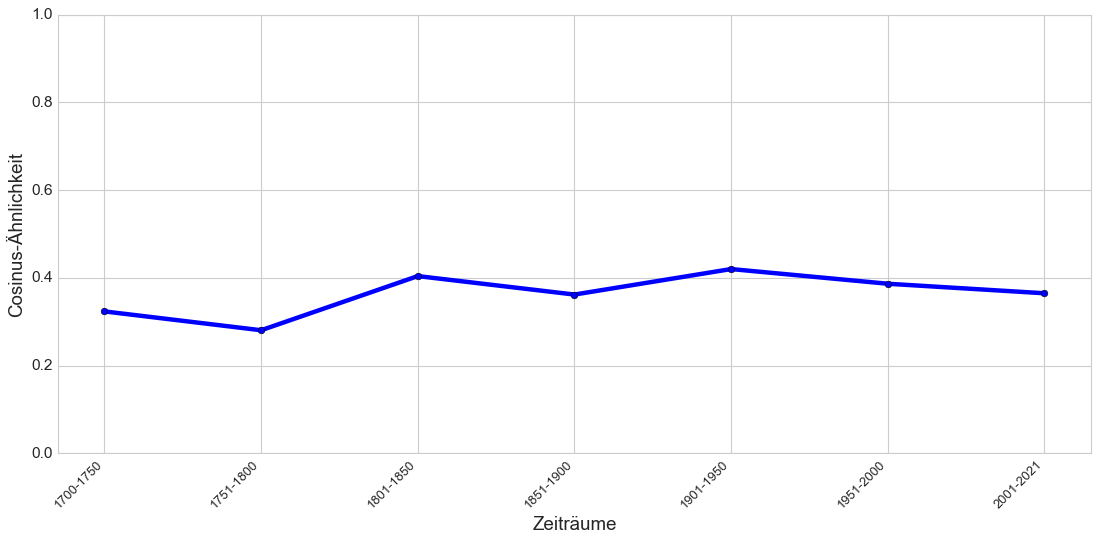

In [44]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='orribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(data.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

#### Quelldomäne

In [45]:
orribilmente1 = compare_cos(periods, models, 'orribilmente', 'angoscia')
orribilmente2 = compare_cos(periods, models, 'orribilmente', 'atterrire')
orribilmente3 = compare_cos(periods, models, 'orribilmente', 'panico')
orribilmente4 = compare_cos(periods, models, 'orribilmente', 'paura')
#orribilmente5 = compare_cos(periods, models, 'orribilmente', 'raccapricciare')
orribilmente6 = compare_cos(periods, models, 'orribilmente', 'schifo')
orribilmente7 = compare_cos(periods, models, 'orribilmente', 'sgomentare')
orribilmente8 = compare_cos(periods, models, 'orribilmente', 'sgomento')
orribilmente9 = compare_cos(periods, models, 'orribilmente', 'spaventare')
orribilmente10 = compare_cos(periods, models, 'orribilmente', 'spavento')
orribilmente11 = compare_cos(periods, models, 'orribilmente', 'terrore')

In [46]:
orribilmente_df = pd.DataFrame([orribilmente1, orribilmente2, orribilmente3, orribilmente4, orribilmente6, orribilmente7, orribilmente8, orribilmente9, orribilmente10, orribilmente11])

# Median pro Zeitraum
orribilmente_median = dict(orribilmente_df.median())

# min pro Zeitraum
orribilmente_min = dict(orribilmente_df.min())
orribilmente_min_list = [float(x) for x in list(orribilmente_min.values())]

#max pro Zeitraum 
orribilmente_max = dict(orribilmente_df.max())
orribilmente_max_list = [float(x) for x in list(orribilmente_max.values())]

# 25%-Quantil
orribilmente_25 = dict(orribilmente_df.quantile(0.25))
orribilmente_25_list = [float(x) for x in list(orribilmente_25.values())]

# 75%-Quantil
orribilmente_75 = dict(orribilmente_df.quantile(0.75))
orribilmente_75_list = [float(x) for x in list(orribilmente_75.values())]

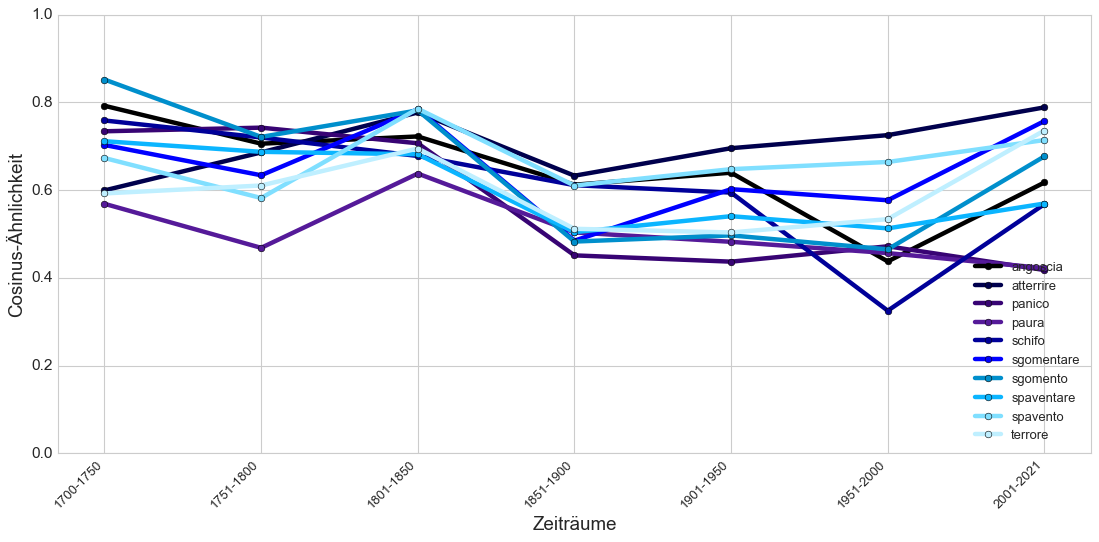

In [47]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

# Nur Median

x_indexes = list(np.arange(len(orribilmente_median)))
plt.xticks(ticks=x_indexes, labels=orribilmente_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orribilmente4.values(), label='paura', marker='o', color='#551a99')
#plt.plot(x_indexes, orribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orribilmente_median.values(), label='Median', marker='o', color='r')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(orribilmente_median.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='lower right', fontsize='small')

plt.show()

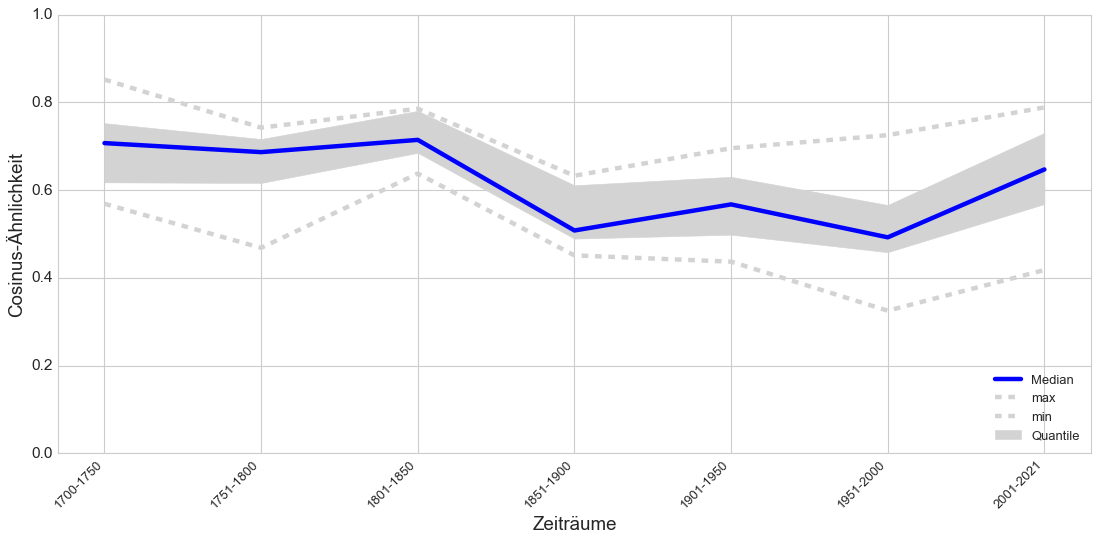

In [48]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_median)))
plt.xticks(ticks=x_indexes, labels=orribilmente_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente_median.values(), label='Median', color='b')
plt.fill_between(x_indexes, orribilmente_75_list, orribilmente_25_list, label='Quantile', color='#D3D3D3')
plt.plot(x_indexes, orribilmente_max_list, label='max', linestyle='--', color='#D3D3D3')
plt.plot(x_indexes, orribilmente_min_list, label='min', linestyle='--', color='#D3D3D3')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(orribilmente_median.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='lower right', fontsize='small')

plt.show()

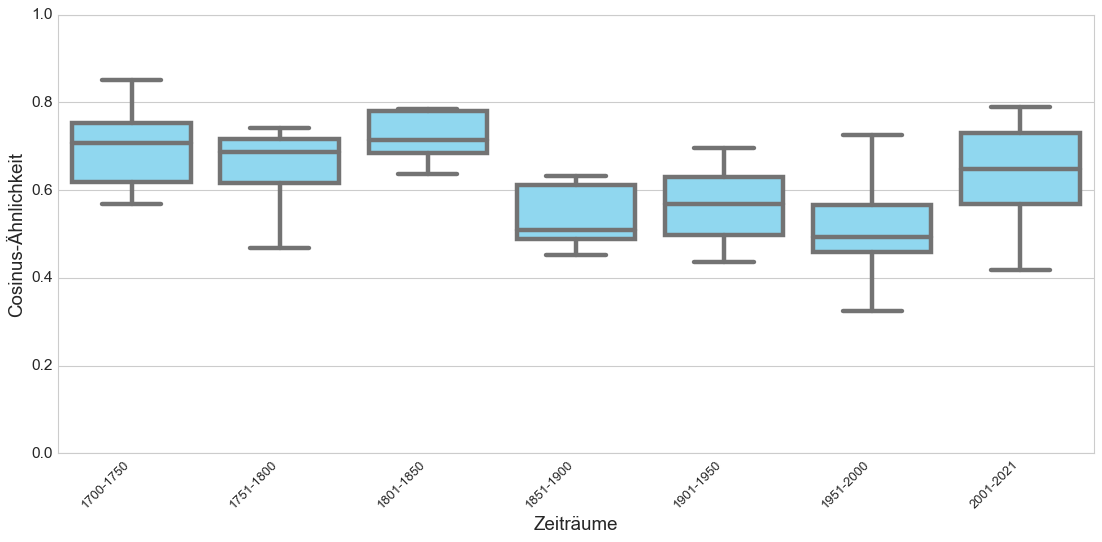

In [49]:
# box plot

plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(periods)))
plt.xticks(ticks=x_indexes, labels=periods, rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

sns.boxplot(data=orribilmente_df, color='#80dfff');

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right', fontsize='small')

plt.show()

### spaventosamente

In [50]:
compare_words(periods, models, 'spaventosamente')

,1700-1750,1751-1800,1801-1850,1851-1900,1901-1950,1951-2000,2001-2021
0,"(vomitate, 0.9506581425666809)",not in vocab,"(sottragge, 0.9857350587844849)","(terremoto, 0.8289197087287903)","(ruggiva, 0.7727130651473999)","(giungla, 0.8105266690254211)","(sfuggente, 0.7790905833244324)"
1,"(smantellata, 0.946724534034729)",not in vocab,"(rovesciate, 0.9851406216621399)","(schiuma, 0.8234478235244751)","(kerim, 0.7701558470726013)","(mostruosamente, 0.7998343706130981)","(feroce, 0.777137815952301)"
2,"(deplorabil, 0.9466813206672668)",not in vocab,"(naiade, 0.9842033386230469)","(cataclisma, 0.8230746984481812)","(convulsione, 0.7672032117843628)","(risucchiare, 0.793246865272522)","(briciola, 0.7612751126289368)"
3,"(seminarvi, 0.946307361125946)",not in vocab,"(placate, 0.9830272197723389)","(risuonanti, 0.8195106983184814)","(sussulto, 0.7622604370117188)","(mostruoso, 0.7871947288513184)","(statura, 0.7522761821746826)"
4,"(impaur, 0.943004310131073)",not in vocab,"(esecrato, 0.9825417399406433)","(furente, 0.8156293630599976)","(ingiuria, 0.7604151368141174)","(polmone, 0.7768762707710266)","(stento, 0.7493547201156616)"
5,"(stemperare, 0.9392393231391907)",not in vocab,"(frigio, 0.9824134707450867)","(scorrersi, 0.815424919128418)","(rantolare, 0.7521360516548157)","(avidità, 0.775661289691925)","(cromatico, 0.7491797208786011)"
6,"(ritruovavano, 0.9356527328491211)",not in vocab,"(vibra, 0.98198401927948)","(clava, 0.8138421773910522)","(epilettico, 0.7520800828933716)","(inesorabilmente, 0.7737745642662048)","(marcato, 0.740908145904541)"
7,"(bitume, 0.9355307817459106)",not in vocab,"(muggente, 0.9817126989364624)","(libeccio, 0.8135889172554016)","(inorridire, 0.7496538162231445)","(spessore, 0.7737541794776917)","(zanna, 0.7405831217765808)"
8,"(pozzi, 0.9352200627326965)",not in vocab,"(abukire, 0.9811610579490662)","(fuggenti, 0.8127579689025879)","(disperazione, 0.7426553964614868)","(radiazione, 0.7730410099029541)","(mostruosamente, 0.7365537285804749)"
9,"(sformare, 0.9350868463516235)",not in vocab,"(dormon, 0.9800318479537964)","(scrosciar, 0.8122413158416748)","(fathma, 0.7418072819709778)","(gradazione, 0.7675718665122986)","(postura, 0.7339041829109192)"


#### molto

In [51]:
compare_cos(periods, models, 'spaventosamente', 'molto')

{'1700-1750': 0.5323606133460999,
 '1801-1850': 0.5689371228218079,
 '1851-1900': 0.4083896279335022,
 '1901-1950': 0.3814011216163635,
 '1951-2000': 0.5909152030944824,
 '2001-2021': 0.5056983232498169}

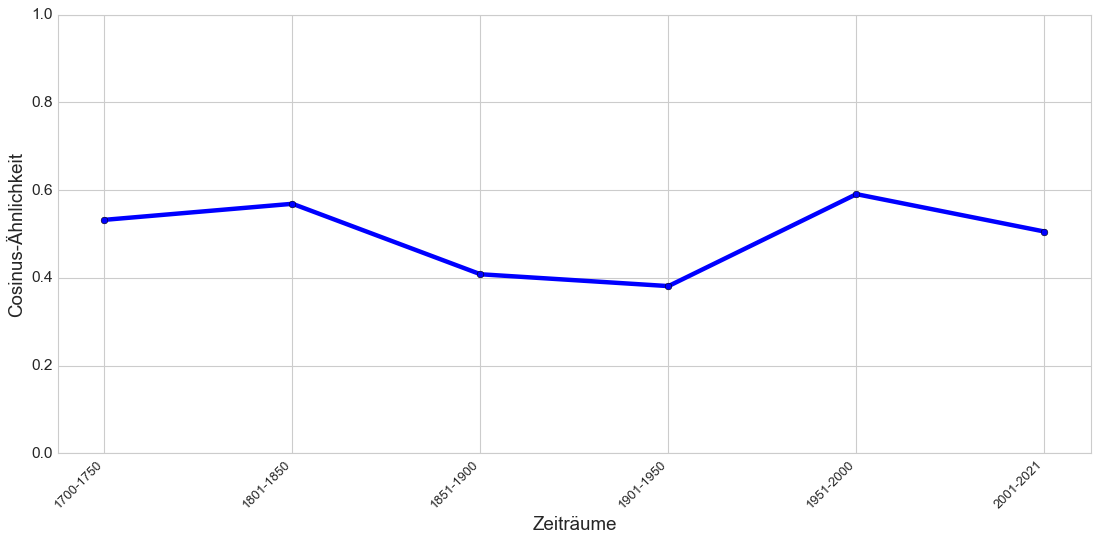

In [52]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'spaventosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='spaventosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(data.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

#### Quelldomäne

In [53]:
spaventosamente1 = compare_cos(periods, models, 'spaventosamente', 'angoscia')
spaventosamente2 = compare_cos(periods, models, 'spaventosamente', 'atterrire')
spaventosamente3 = compare_cos(periods, models, 'spaventosamente', 'panico')
spaventosamente4 = compare_cos(periods, models, 'spaventosamente', 'paura')
#spaventosamente5 = compare_cos(periods, models, 'spaventosamente', 'raccapricciare')
spaventosamente6 = compare_cos(periods, models, 'spaventosamente', 'schifo')
spaventosamente7 = compare_cos(periods, models, 'spaventosamente', 'sgomentare')
spaventosamente8 = compare_cos(periods, models, 'spaventosamente', 'sgomento')
spaventosamente9 = compare_cos(periods, models, 'spaventosamente', 'spaventare')
spaventosamente10 = compare_cos(periods, models, 'spaventosamente', 'spavento')
spaventosamente11 = compare_cos(periods, models, 'spaventosamente', 'terrore')

In [54]:
spaventosamente_df = pd.DataFrame([spaventosamente1, spaventosamente2, spaventosamente3, spaventosamente4, spaventosamente6, spaventosamente7, spaventosamente8, spaventosamente9, spaventosamente10, spaventosamente11])

# Median pro Zeitraum
spaventosamente_median = dict(spaventosamente_df.median())

# min pro Zeitraum
spaventosamente_min = dict(spaventosamente_df.min())
spaventosamente_min_list = [float(x) for x in list(spaventosamente_min.values())]

#max pro Zeitraum 
spaventosamente_max = dict(spaventosamente_df.max())
spaventosamente_max_list = [float(x) for x in list(spaventosamente_max.values())]

# 25%-Quantil
spaventosamente_25 = dict(spaventosamente_df.quantile(0.25))
spaventosamente_25_list = [float(x) for x in list(spaventosamente_25.values())]

# 75%-Quantil
spaventosamente_75 = dict(spaventosamente_df.quantile(0.75))
spaventosamente_75_list = [float(x) for x in list(spaventosamente_75.values())]

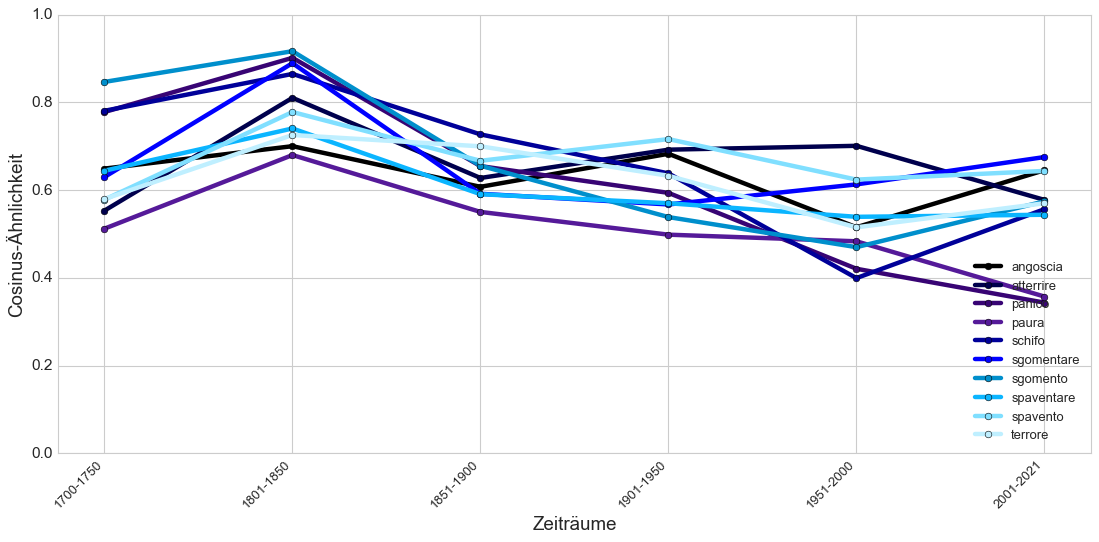

In [55]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

# Nur Median

x_indexes = list(np.arange(len(spaventosamente_median)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, spaventosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, spaventosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, spaventosamente4.values(), label='paura', marker='o', color='#551a99')
#plt.plot(x_indexes, spaventosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, spaventosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, spaventosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, spaventosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, spaventosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, spaventosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, spaventosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, spaventosamente_median.values(), label='Median', marker='o', color='r')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(spaventosamente_median.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='lower right', fontsize='small')

plt.show()

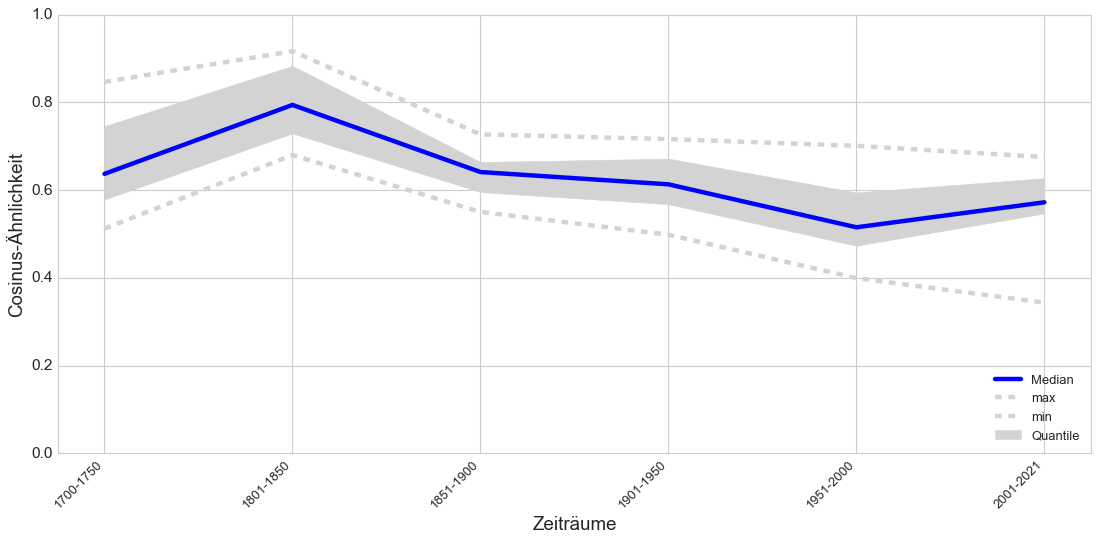

In [56]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_median)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente_median.values(), label='Median', color='b')
plt.fill_between(x_indexes, spaventosamente_75_list, spaventosamente_25_list, label='Quantile', color='#D3D3D3')
plt.plot(x_indexes, spaventosamente_max_list, label='max', linestyle='--', color='#D3D3D3')
plt.plot(x_indexes, spaventosamente_min_list, label='min', linestyle='--', color='#D3D3D3')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(spaventosamente_median.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='lower right', fontsize='small')

plt.show()

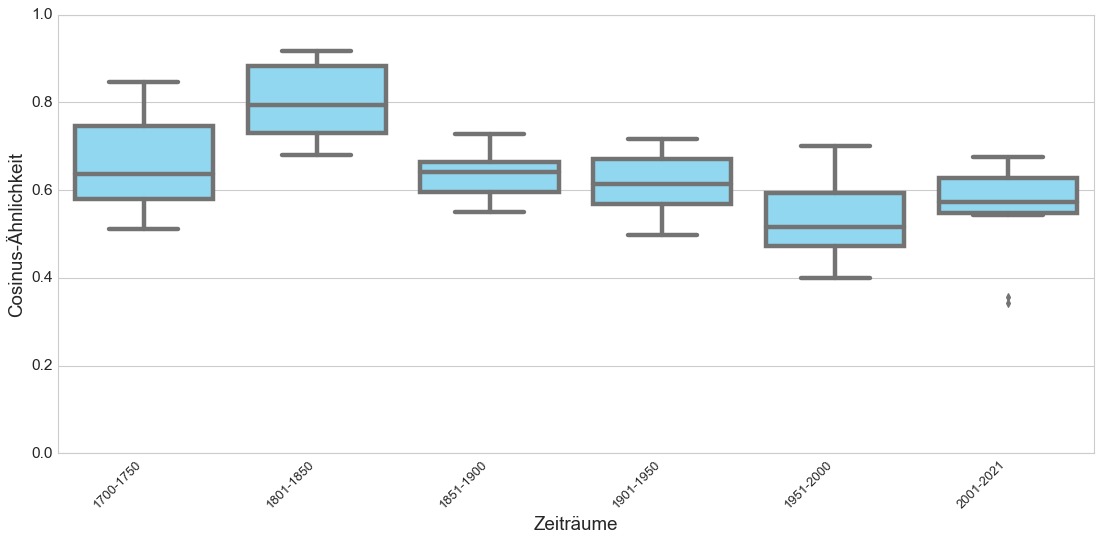

In [57]:
# box plot

plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(periods)))
plt.xticks(ticks=x_indexes, labels=periods, rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

sns.boxplot(data=spaventosamente_df, color='#80dfff');

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right', fontsize='small')

plt.show()

### terribilmente

In [58]:
compare_words(periods, models, 'terribilmente')

,1700-1750,1751-1800,1801-1850,1851-1900,1901-1950,1951-2000,2001-2021
0,"(miliscola, 0.9703544974327087)","(barbarico, 0.9459130167961121)","(scoperto, 0.9098058342933655)","(tremendamente, 0.7536352276802063)","(ferocia, 0.7968036532402039)","(sciocco, 0.747019350528717)","(postura, 0.7900534868240356)"
1,"(istradò, 0.967149555683136)","(atterriti, 0.9454595446586609)","(kur, 0.9062101244926453)","(ripiombare, 0.7393062710762024)","(crudele, 0.7726971507072449)","(autogol, 0.7308568358421326)","(alcolismo, 0.780076265335083)"
2,"(tirata, 0.9660560488700867)","(succede, 0.9450398683547974)","(velocit, 0.9035810232162476)","(bargello, 0.7322658896446228)","(incomposto, 0.7684025168418884)","(antiborgesiano, 0.7283496260643005)","(malinconia, 0.7799216508865356)"
3,"(bastie, 0.9649165272712708)","(ascalon, 0.9449635148048401)","(inazione, 0.9026464819908142)","(scoverto, 0.7311400771141052)","(straube, 0.7683837413787842)","(stanchezza, 0.7251030802726746)","(velato, 0.7774100303649902)"
4,"(navig, 0.9641743302345276)","(samarcanda, 0.9444025754928589)","(risolutezza, 0.9012609124183655)","(minacciatore, 0.7277699708938599)","(perfido, 0.7664923667907715)","(indecoroso, 0.7202932238578796)","(tremendamente, 0.7753252387046814)"
5,"(gant, 0.9640863537788391)","(ritirer, 0.9438295364379883)","(debolmente, 0.9005038738250732)","(oppressura, 0.7164964079856873)","(astanti, 0.7623761296272278)","(mirabolante, 0.7181141972541809)","(tormento, 0.7730879783630371)"
6,"(sorser, 0.9635912179946899)","(scorreano, 0.9434130191802979)","(abituare, 0.9002390503883362)","(incastrare, 0.7161685824394226)","(castigare, 0.7590123414993286)","(improvvisatore, 0.714920163154602)","(persuadere, 0.7711731195449829)"
7,"(uccellatore, 0.9629676938056946)","(ricevea, 0.9416055679321289)","(bersaglio, 0.8995630741119385)","(sciagurata, 0.7154709696769714)","(passacantando, 0.7588023543357849)","(soffrire, 0.713881254196167)","(atroce, 0.770997166633606)"
8,"(pest, 0.9629361629486084)","(nuda, 0.9412945508956909)","(celerit, 0.8993237614631653)","(stravolto, 0.7116928696632385)","(gelosia, 0.7566301226615906)","(barros, 0.7129955291748047)","(fecondo, 0.7682145833969116)"
9,"(affront, 0.9626341462135315)","(clans, 0.941227376461029)","(pedata, 0.8973942995071411)","(saliva, 0.711346447467804)","(immolare, 0.7541876435279846)","(deprimente, 0.7118976712226868)","(soprannaturale, 0.768100380897522)"


#### molto

In [59]:
compare_cos(periods, models, 'terribilmente', 'molto')

{'1700-1750': 0.5355393886566162,
 '1751-1800': 0.5225579142570496,
 '1801-1850': 0.5468056797981262,
 '1851-1900': 0.38705188035964966,
 '1901-1950': 0.44995978474617004,
 '1951-2000': 0.5506849884986877,
 '2001-2021': 0.5423709750175476}

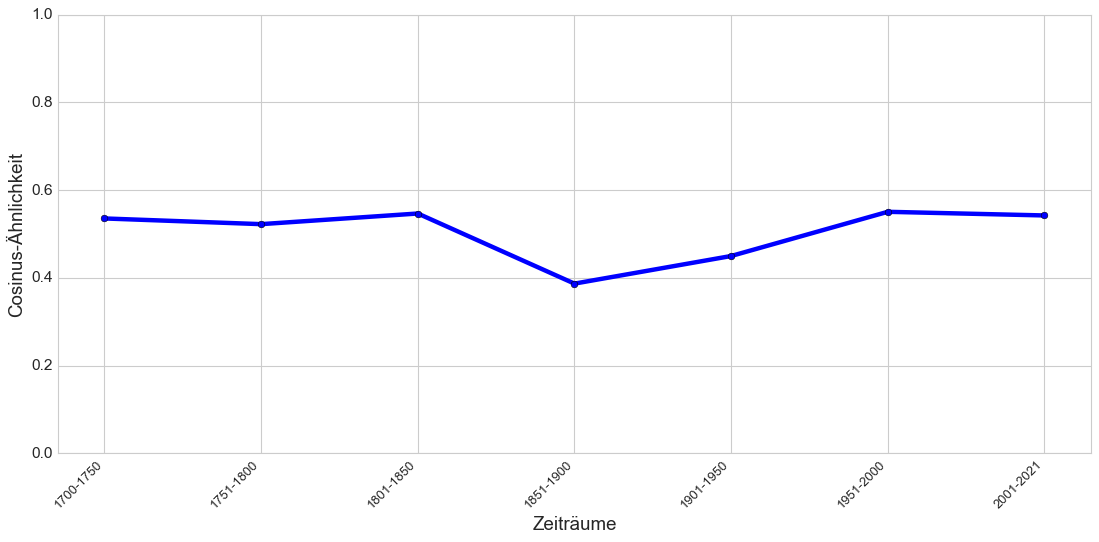

In [60]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'terribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='terribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(data.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

#### Quelldomäne

In [61]:
terribilmente1 = compare_cos(periods, models, 'terribilmente', 'angoscia')
terribilmente2 = compare_cos(periods, models, 'terribilmente', 'atterrire')
terribilmente3 = compare_cos(periods, models, 'terribilmente', 'panico')
terribilmente4 = compare_cos(periods, models, 'terribilmente', 'paura')
#terribilmente5 = compare_cos(periods, models, 'terribilmente', 'raccapricciare')
terribilmente6 = compare_cos(periods, models, 'terribilmente', 'schifo')
terribilmente7 = compare_cos(periods, models, 'terribilmente', 'sgomentare')
terribilmente8 = compare_cos(periods, models, 'terribilmente', 'sgomento')
terribilmente9 = compare_cos(periods, models, 'terribilmente', 'spaventare')
terribilmente10 = compare_cos(periods, models, 'terribilmente', 'spavento')
terribilmente11 = compare_cos(periods, models, 'terribilmente', 'terrore')

In [62]:
terribilmente_df = pd.DataFrame([terribilmente1, terribilmente2, terribilmente3, terribilmente4, terribilmente6, terribilmente7, terribilmente8, terribilmente9, terribilmente10, terribilmente11])

# Median pro Zeitraum
terribilmente_median = dict(terribilmente_df.median())

# min pro Zeitraum
terribilmente_min = dict(terribilmente_df.min())
terribilmente_min_list = [float(x) for x in list(terribilmente_min.values())]

#max pro Zeitraum 
terribilmente_max = dict(terribilmente_df.max())
terribilmente_max_list = [float(x) for x in list(terribilmente_max.values())]

# 25%-Quantil
terribilmente_25 = dict(terribilmente_df.quantile(0.25))
terribilmente_25_list = [float(x) for x in list(terribilmente_25.values())]

# 75%-Quantil
terribilmente_75 = dict(terribilmente_df.quantile(0.75))
terribilmente_75_list = [float(x) for x in list(terribilmente_75.values())]

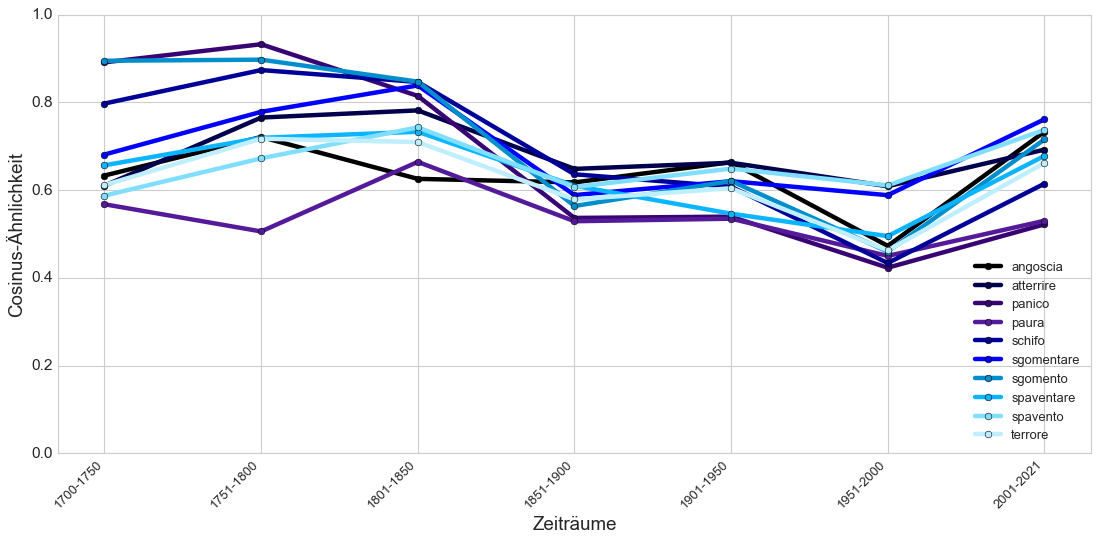

In [63]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

# Nur Median

x_indexes = list(np.arange(len(terribilmente_median)))
plt.xticks(ticks=x_indexes, labels=terribilmente_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, terribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, terribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, terribilmente4.values(), label='paura', marker='o', color='#551a99')
#plt.plot(x_indexes, terribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, terribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, terribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, terribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, terribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, terribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, terribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, terribilmente_median.values(), label='Median', marker='o', color='r')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(terribilmente_median.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='lower right', fontsize='small')

plt.show()

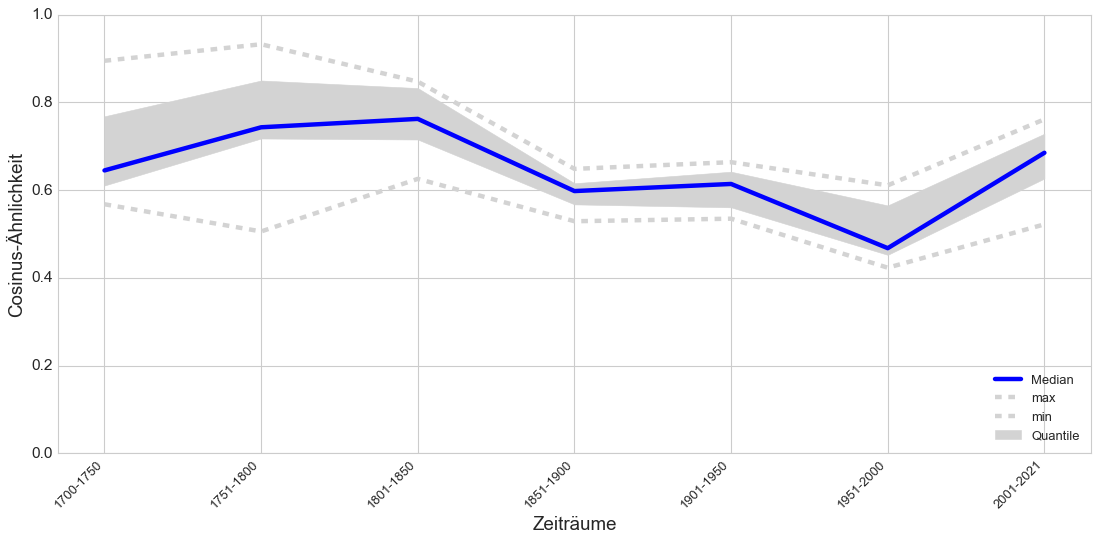

In [64]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_median)))
plt.xticks(ticks=x_indexes, labels=terribilmente_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente_median.values(), label='Median', color='b')
plt.fill_between(x_indexes, terribilmente_75_list, terribilmente_25_list, label='Quantile', color='#D3D3D3')
plt.plot(x_indexes, terribilmente_max_list, label='max', linestyle='--', color='#D3D3D3')
plt.plot(x_indexes, terribilmente_min_list, label='min', linestyle='--', color='#D3D3D3')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(terribilmente_median.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='lower right', fontsize='small')

plt.show()

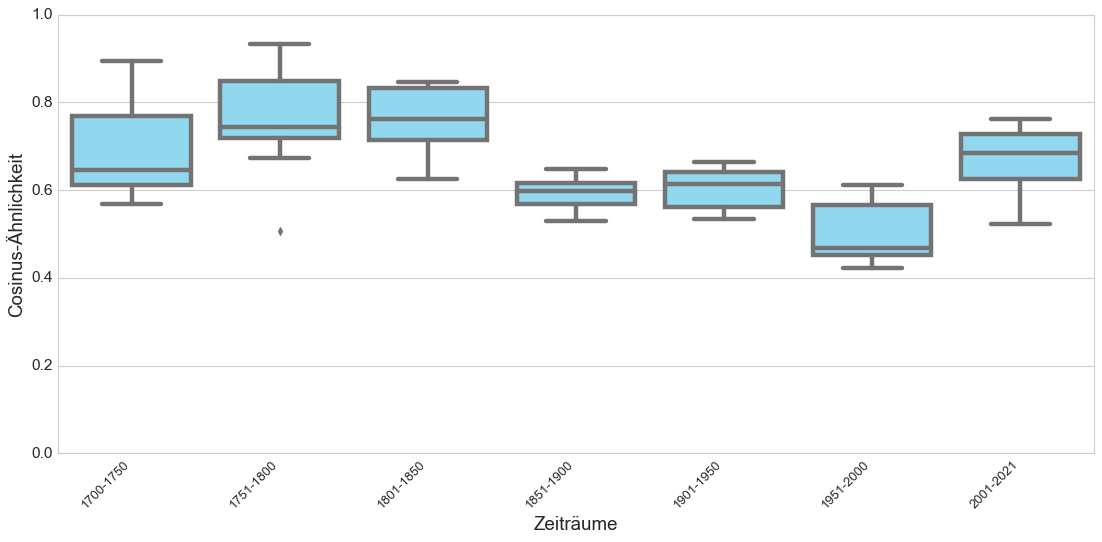

In [65]:
# box plot

plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(periods)))
plt.xticks(ticks=x_indexes, labels=periods, rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

sns.boxplot(data=terribilmente_df, color='#80dfff');

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right', fontsize='small')

plt.show()

### tremendamente

In [66]:
compare_words(periods, models, 'tremendamente')

,1700-1750,1751-1800,1801-1850,1851-1900,1901-1950,1951-2000,2001-2021
0,not in vocab,not in vocab,"(scoperchiare, 0.9858647584915161)","(incastrare, 0.8499874472618103)","(palesare, 0.8984076380729675)","(pugile, 0.8535791039466858)","(alcolismo, 0.879240870475769)"
1,not in vocab,not in vocab,"(notturne, 0.9831835031509399)","(straziare, 0.8323283195495605)","(irragionevole, 0.8911718130111694)","(stranezza, 0.8471091389656067)","(intensamente, 0.8677659034729004)"
2,not in vocab,not in vocab,"(quaglia, 0.9827540516853333)","(crudelt, 0.8291827440261841)","(spasimi, 0.8821719884872437)","(consolante, 0.8448187112808228)","(ricambiare, 0.8670226335525513)"
3,not in vocab,not in vocab,"(tuoni, 0.9819928407669067)","(spasimi, 0.8156552314758301)","(insperato, 0.8789207339286804)","(autoerotismo, 0.8440715074539185)","(ansioso, 0.8647568821907043)"
4,not in vocab,not in vocab,"(vase, 0.9817062020301819)","(struggersi, 0.8151788115501404)","(disinganno, 0.8786640763282776)","(riuscito, 0.8437324166297913)","(stravolgimento, 0.8645816445350647)"
5,not in vocab,not in vocab,"(limpid, 0.9816377758979797)","(frenesia, 0.8129206895828247)","(incosciente, 0.8770372271537781)","(deludente, 0.8412245512008667)","(balbettare, 0.8643893599510193)"
6,not in vocab,not in vocab,"(fuggìa, 0.9815879464149475)","(comprimere, 0.8082653284072876)","(irrisione, 0.8769747018814087)","(superstar, 0.8410347104072571)","(malinconia, 0.8642113208770752)"
7,not in vocab,not in vocab,"(volse, 0.9814769625663757)","(quietarmi, 0.8071276545524597)","(irritazione, 0.874674379825592)","(risaputo, 0.8401452898979187)","(esuberanza, 0.86378413438797)"
8,not in vocab,not in vocab,"(usciro, 0.9811079502105713)","(calmati, 0.8071136474609375)","(vigliacco, 0.8731716871261597)","(ravanelli, 0.839215874671936)","(noioso, 0.8629502654075623)"
9,not in vocab,not in vocab,"(gravar, 0.9809108972549438)","(tecla, 0.8064520359039307)","(repulsione, 0.8709325790405273)","(atleta, 0.8372234106063843)","(giochino, 0.8628984689712524)"


#### molto

In [67]:
compare_cos(periods, models, 'tremendamente', 'molto')

{'1801-1850': 0.5311775803565979,
 '1851-1900': 0.40668627619743347,
 '1901-1950': 0.4920485317707062,
 '1951-2000': 0.6358062624931335,
 '2001-2021': 0.6025807857513428}

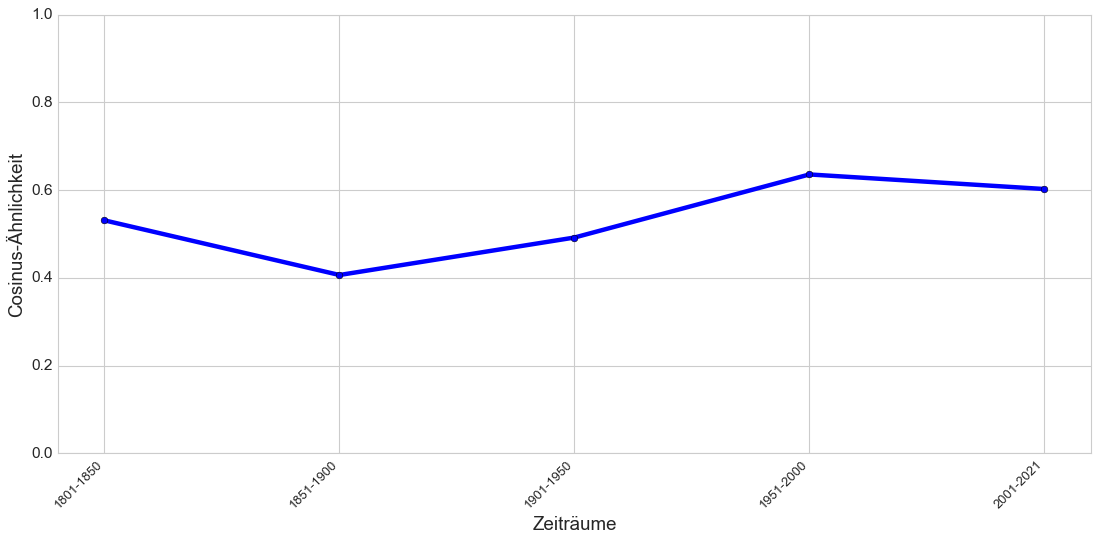

In [68]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'tremendamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='tremendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(data.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

#### Quelldomäne

In [69]:
tremendamente1 = compare_cos(periods, models, 'tremendamente', 'angoscia')
tremendamente2 = compare_cos(periods, models, 'tremendamente', 'atterrire')
tremendamente3 = compare_cos(periods, models, 'tremendamente', 'panico')
tremendamente4 = compare_cos(periods, models, 'tremendamente', 'paura')
#tremendamente5 = compare_cos(periods, models, 'tremendamente', 'raccapricciare')
tremendamente6 = compare_cos(periods, models, 'tremendamente', 'schifo')
tremendamente7 = compare_cos(periods, models, 'tremendamente', 'sgomentare')
tremendamente8 = compare_cos(periods, models, 'tremendamente', 'sgomento')
tremendamente9 = compare_cos(periods, models, 'tremendamente', 'spaventare')
tremendamente10 = compare_cos(periods, models, 'tremendamente', 'spavento')
tremendamente11 = compare_cos(periods, models, 'tremendamente', 'terrore')

In [70]:
tremendamente_df = pd.DataFrame([tremendamente1, tremendamente2, tremendamente3, tremendamente4, tremendamente6, tremendamente7, tremendamente8, tremendamente9, tremendamente10, tremendamente11])

# Median pro Zeitraum
tremendamente_median = dict(tremendamente_df.median())

# min pro Zeitraum
tremendamente_min = dict(tremendamente_df.min())
tremendamente_min_list = [float(x) for x in list(tremendamente_min.values())]

#max pro Zeitraum 
tremendamente_max = dict(tremendamente_df.max())
tremendamente_max_list = [float(x) for x in list(tremendamente_max.values())]

# 25%-Quantil
tremendamente_25 = dict(tremendamente_df.quantile(0.25))
tremendamente_25_list = [float(x) for x in list(tremendamente_25.values())]

# 75%-Quantil
tremendamente_75 = dict(tremendamente_df.quantile(0.75))
tremendamente_75_list = [float(x) for x in list(tremendamente_75.values())]

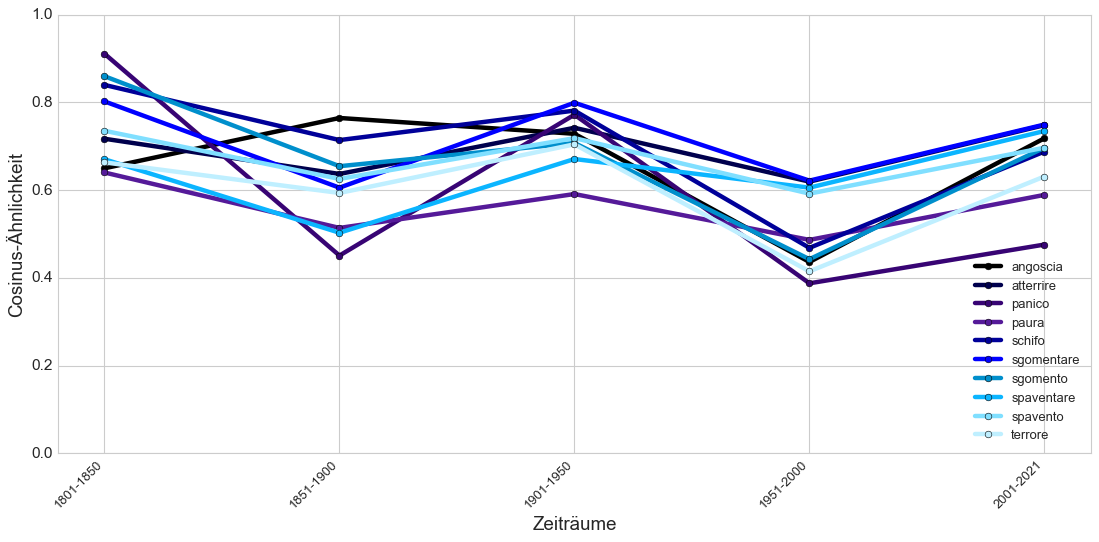

In [71]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

# Nur Median

x_indexes = list(np.arange(len(tremendamente_median)))
plt.xticks(ticks=x_indexes, labels=tremendamente_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, tremendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, tremendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, tremendamente4.values(), label='paura', marker='o', color='#551a99')
#plt.plot(x_indexes, tremendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, tremendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, tremendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, tremendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, tremendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, tremendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, tremendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, tremendamente_median.values(), label='Median', marker='o', color='r')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(tremendamente_median.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='lower right', fontsize='small')

plt.show()

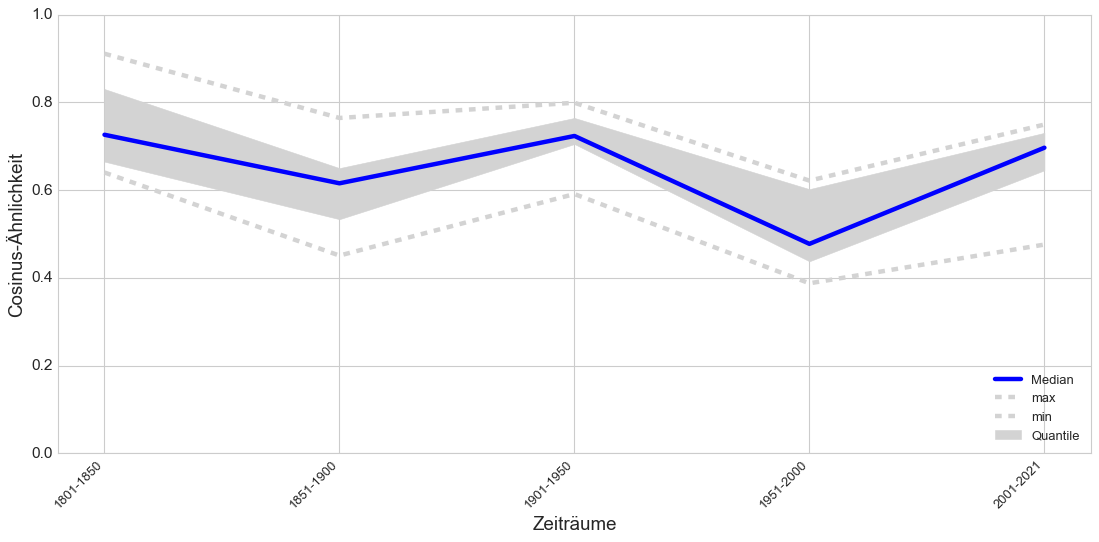

In [72]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_median)))
plt.xticks(ticks=x_indexes, labels=tremendamente_median.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente_median.values(), label='Median', color='b')
plt.fill_between(x_indexes, tremendamente_75_list, tremendamente_25_list, label='Quantile', color='#D3D3D3')
plt.plot(x_indexes, tremendamente_max_list, label='max', linestyle='--', color='#D3D3D3')
plt.plot(x_indexes, tremendamente_min_list, label='min', linestyle='--', color='#D3D3D3')

# Regressionslinie
# coef = np.polyfit(x_indexes, list(tremendamente_median.values()), 1)
# poly1d_fn = np.poly1d(coef) 
# plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='lower right', fontsize='small')

plt.show()

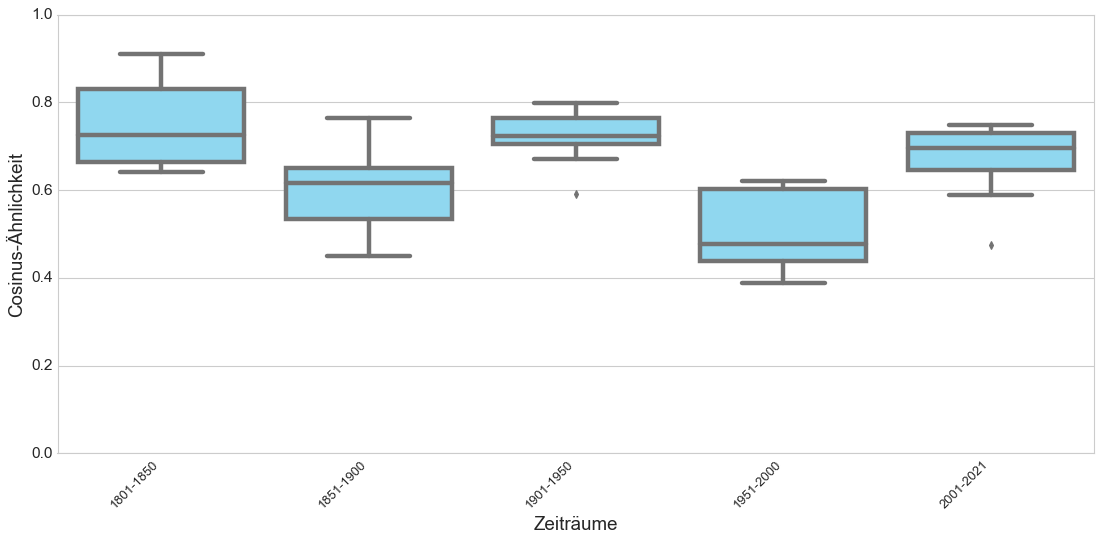

In [73]:
# box plot

plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(periods)))
plt.xticks(ticks=x_indexes, labels=periods, rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

sns.boxplot(data=tremendamente_df, color='#80dfff');

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right', fontsize='small')

plt.show()